In [164]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from ggplot import *

%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_colwidth = -1

In [181]:
with open('lda_top_tweets.pkl', 'rb') as pklfile:
    top_tweets = pickle.load(pklfile)

In [182]:
top_tweets['polarity'] = top_tweets.text.apply(lambda x: TextBlob(x).sentiment.polarity)
top_tweets['subjectivity'] = top_tweets.text.apply(lambda x: TextBlob(x).sentiment.subjectivity)
top_tweets['pol_z'] = top_tweets.groupby(['community','topic']).polarity.transform(lambda x: (x-np.mean(x))/np.std(x))

In [183]:
top_tweets['topic_num'] = top_tweets.topic
top_tweets.topic = top_tweets.topic.apply(lambda x: str(x))

In [184]:
# Name topics that are coherent, NaN topics that are muddy
top_tweets.loc[top_tweets.community == '10', 'topic'] = top_tweets.loc[top_tweets.community == '10', 'topic']. \
    replace(['0','1','2','3','4','5','6','7','8','9'], ['shell','','tillerson','reef','permafrost','',
                                                        'melt','budget','group17','pruitt'])
    
top_tweets.loc[top_tweets.community == '3', 'topic'] = top_tweets.loc[top_tweets.community == '3', 'topic']. \
    replace(['0','1','2','3','4','5','6','7'], ['nye','pruitt','','budget','','','',''])
    
top_tweets.loc[top_tweets.community == '4', 'topic'] = top_tweets.loc[top_tweets.community == '4', 'topic']. \
    replace(['0','1','2','3','4','5','6','7'], ['pruitt','women','energy','','','','reef',''])
    
top_tweets.loc[top_tweets.community == '2', 'topic'] = top_tweets.loc[top_tweets.community == '2', 'topic']. \
    replace(['0','1','2','3','4','5','6'], ['','pruitt','','','nye','budget',''])

top_tweets.loc[top_tweets.community == '18', 'topic'] = top_tweets.loc[top_tweets.community == '18', 'topic']. \
    replace(['0','1','2','3','4','5','6','7'], ['','budget','','tillerson','reef','','pruitt',''])

top_tweets.loc[top_tweets.community == '12', 'topic'] = top_tweets.loc[top_tweets.community == '12', 'topic']. \
    replace(['0','1','2','3','4','5','6','7'], ['','reef','inuit','budget','','','pruitt',''])

top_tweets.loc[top_tweets.community == '28', 'topic'] = top_tweets.loc[top_tweets.community == '28', 'topic']. \
    replace(['0','1','2','3','4','5','6'], ['shell','uk','budget','reef','pruitt','',''])

top_tweets.loc[top_tweets.community == '9', 'topic'] = top_tweets.loc[top_tweets.community == '9', 'topic']. \
    replace(['0','1','2','3','4','5','6','7'], ['','pruitt','budget','','emissions','','','tillerson'])

In [ ]:
# Name communities
#top_tweets.community.replace(['10','3','4','2','18','12','28','9'],['global','deniers','climate',''])

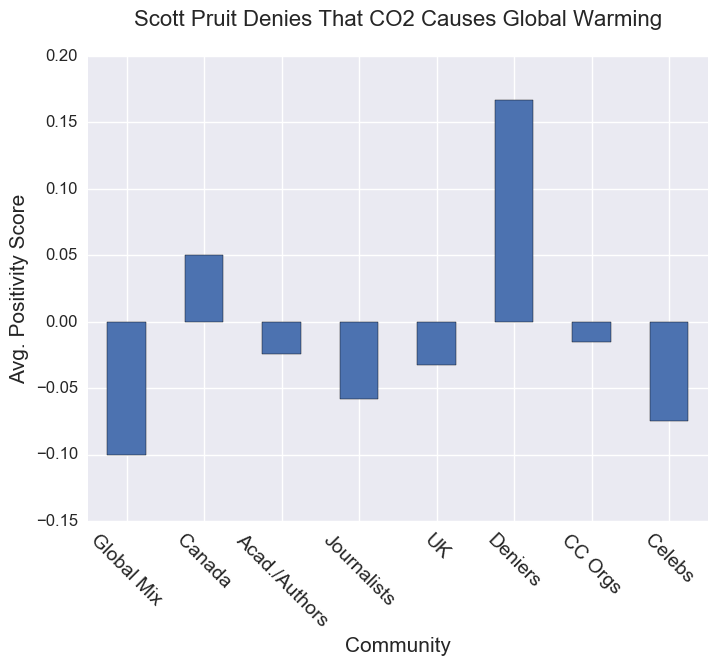

In [266]:
fig = plt.figure(figsize=(8,6))
top_tweets[(top_tweets.topic=='pruitt') & (top_tweets.subjectivity != 0)].groupby('community'). \
    polarity.mean().plot(kind='bar')
plt.ylabel('Avg. Positivity Score', fontsize=15)
plt.xlabel('Community', fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(np.arange(8),('Global Mix', 'Canada','Acad./Authors','Journalists','UK','Deniers',
                         'CC Orgs','Celebs'), rotation=-45, fontsize=14)
plt.title('Scott Pruit Denies That CO2 Causes Global Warming', fontsize=16). \
    set_position([.5, 1.05]);

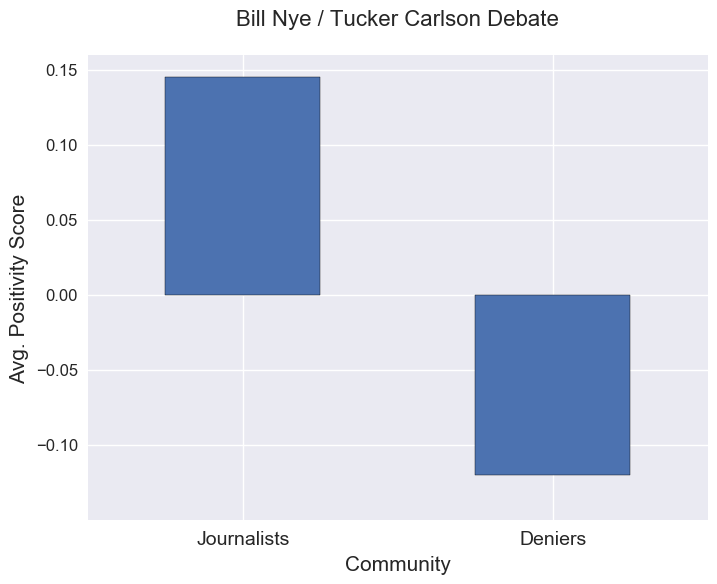

In [268]:
fig = plt.figure(figsize=(8,6))
top_tweets[(top_tweets.topic=='nye') & (top_tweets.subjectivity != 0)].groupby('community'). \
    polarity.mean().plot(kind='bar')
plt.ylabel('Avg. Positivity Score', fontsize=15)
plt.xlabel('Community', fontsize=15)
plt.xticks(np.arange(2), ('Journalists', 'Deniers'), rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(-.15, .16)
plt.title('Bill Nye / Tucker Carlson Debate', fontsize=16).set_position([.5,1.05])

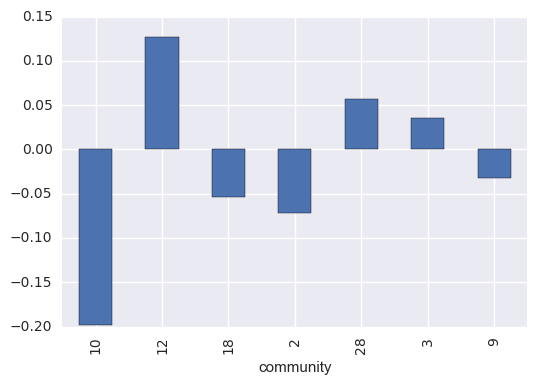

In [201]:
top_tweets[(top_tweets.topic=='budget') & (top_tweets.subjectivity != 0)].groupby('community'). \
    polarity.mean().plot(kind='bar')

In [174]:
top_tweets.groupby(['community', 'topic']).size()

community  topic     
10                       200
           budget        100
           group17       100
           melt          100
           permafrost    100
           pruitt        100
           reef          100
           shell         100
           tillerson     100
12                       400
           budget        100
           inuit         100
           pruitt        100
           reef          100
18                       400
           budget        100
           pruitt        100
           reef          100
           tillerson     100
2                        400
           budget        100
           nye           100
           pruitt        100
28                       200
           budget        100
           pruitt        100
           reef          100
           shell         100
           uk            100
3                        500
           budget        100
           nye           100
           pruitt        100
4                    

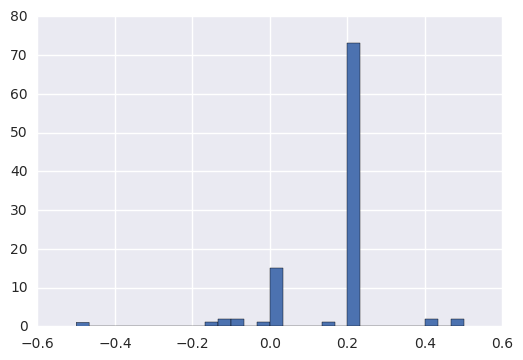

In [178]:
top_tweets[(top_tweets.community == '3') & (top_tweets.topic == 'pruitt')].polarity.hist(bins=30)

In [196]:
top_tweets.groupby(['community', 'topic']).polarity.agg(['mean', 'std']).reset_index(). \
    sort_values(['topic','community'], ascending=False)

,community,topic,mean,std
37,4,women,0.105375,0.122059
28,28,uk,0.003875,0.144240
42,9,tillerson,0.016271,0.128731
18,18,tillerson,0.057513,0.206075
8,10,tillerson,0.091678,0.110794
27,28,shell,0.020095,0.169509
7,10,shell,0.010333,0.073847
36,4,reef,0.240652,0.117776
26,28,reef,0.309721,0.213406
17,18,reef,0.274082,0.077989


In [189]:
top_tweets.loc[(top_tweets.community == '3') & (top_tweets.topic == 'pruitt'), ['name', 'text', 'polarity', 'pol_z']]. \
    sort_values('pol_z')

,name,text,polarity,pol_z
1131,R Shepherd-DuBey,"Prefers fake news to science? Trump's budget plans will 'cripple' science in the US, world's biggest scientific soc",-0.500000,-5.073460
1148,PinkPanther,. U don't get that fake science can't pass for real science. Science IS asking Q's,-0.150000,-2.363301
1124,Richard Wakefield,"That is not how science works. Not any other field does science work that way. Just climate science is ""settled"".",-0.125000,-2.169718
1189,TJ TJ,Fake news now replaced by Maddow science..the science you only think you have..but really it's not..climate science just hype,-0.100000,-1.976136
1179,Adrian Rolfe,"science says there is global warming other science says there isn't, conclusion science us just guessing !",-0.078125,-1.806751
1126,Richard W. Jones ❤⛽,Science Restored in DC! EPA chief says CO2 not primary contributor to 'global warming'\n last! Celebrate CO2,-0.066667,-1.718025
1182,FuzzDog,"Just as Social Science is not necessarily science, Climate Science is not necessarily same level of BS as other X Science",-0.022917,-1.379255
1153,Trump Is My Pres🌐,#Trump 🇺🇸 Trump's EPA Chief Denies the Basic Science of Climate Change 👈See Here 🇺🇸,0.000000,-1.201804
1159,Jason ن 🇺🇸,"Liberal science guy:\nScience means questioning everything. Well, except global warming of course, you can't question that...because science!",0.000000,-1.201804
1146,Rodger L Nelson,". Well he does have a political science degree, and what is climate science if not political science?",0.000000,-1.201804


In [232]:
top_tweets.loc[(top_tweets.community == '3') & (top_tweets.topic == 'nye'), \
               ['screen_name', 'name', 'text', 'subjectivity', 'polarity', 'pol_z']]. \
    sort_values('pol_z')

,screen_name,name,text,subjectivity,polarity,pol_z
1013,AnicaBudimir,AnicaBudimir,REAL FAKE NEWS exposed: '97% of scientists agree climate change' is engineered hoax..what media never told you -,1.000000,-7.500000e-01,-4.139237
1016,StefanMolyneux,Stefan Molyneux,Tucker Carlson debates Bill Nye The Globalist Guy on Climate Change - then Nye gets very very weird.,1.000000,-6.500000e-01,-3.566247
1022,JAmy208,Juliet Amy,Tucker Carlson OUTS Bill Nye as a Fake Science Guy 'Fraud' [VIDEO] via \n#weather #climatechange #hoax,1.000000,-5.000000e-01,-2.706763
1021,devoncatt,R Shepherd-DuBey,"Prefers fake news to science? Trump's budget plans will 'cripple' science in the US, world's biggest scientific soc",1.000000,-5.000000e-01,-2.706763
1039,DavidTheroux,David J. Theroux,9 reasons Bill Nye is Fake Science Guy #science #progressive #climate #draitheswamp #fakenews #corruption #freedom,1.000000,-5.000000e-01,-2.706763
1049,mikeez3,Deplorable Mike,The global warming hoax comes home to roost! Fake news. Fake govt. Fake weather. Fake politics!,0.800000,-4.250000e-01,-2.277021
1009,LasVegasRaidahz,Jay Cicero,"left is fake. Fake news,fake hate hoaxes,fake outage,fake russians,no wonder they cling so hard to the climate change ""maybe.""",0.688333,-4.183333e-01,-2.238822
1087,at1nothere,Lawrence Page,LMAO and the Idiot Trump says climate change is fake news and a farce. Trump u idiot time to enter the real world,0.733333,-2.833333e-01,-1.465286
1015,davidleelawson,David Lawson,"Bill Nye the FAKE Science Guy On Climate Change - Can't Answer Basic ""Settled"" Science QuestionThe\nNot overwhelming?",0.708333,-2.500000e-01,-1.274290
1024,GDBlackmon,David Blackmon,"Bill Nye, the #ClimateFraud guy, epic fail: Bill Nye’s Embarrassing Face-off with Tucker Carlson on Climate Change…",0.350000,-2.000000e-01,-0.987795
